In [1]:
import yfinance as yf

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, median_absolute_error

In [2]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-12-12,100043.000000,100043.000000,102524.914062,99339.953125,101167.804688,72073983533
2024-12-13,101459.257812,101459.257812,101888.804688,99233.281250,100046.648438,56894751583


In [9]:
print(df.columns)

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


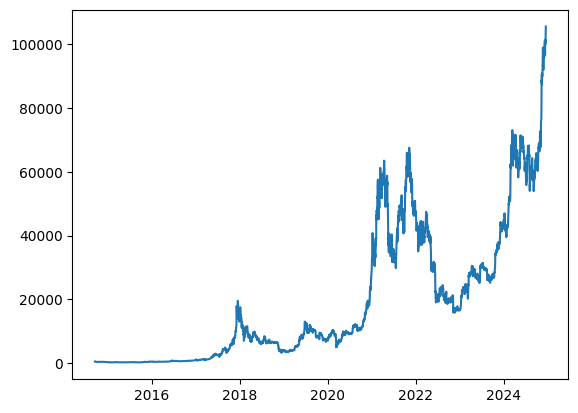

In [12]:
plt.plot(df.index, df[('Adj Close', 'BTC-USD')])

In [21]:
#split in train test
to_row = int(len(df)*0.9)#give 90% data

training_data = list(df[0:to_row]['Adj Close', 'BTC-USD'])
testing_data = list(df[to_row:]['Adj Close', 'BTC-USD'])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

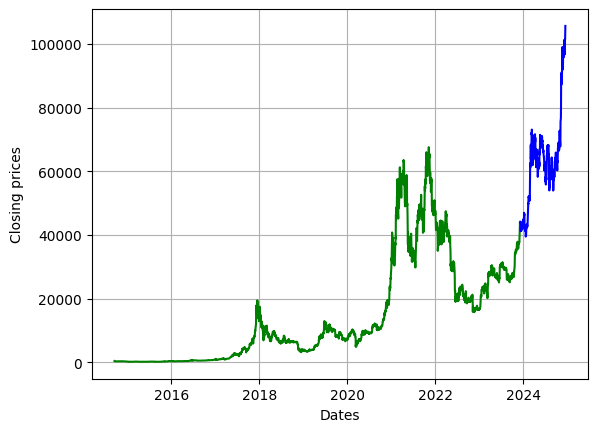

In [23]:
#graph of splitted data
plt.Figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close', 'BTC-USD'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close', 'BTC-USD'],'blue',label='Test data')
plt.legend